#**Task 2: Predication using Unsupervised ML**
- #### **Kmean Clustering** to predict the optimum number of clusters in the Iris dataset.

## **Importing the required libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans




---


## **Reading the Dataset**

In [2]:
# Reading the CSV file DataFrame
data = pd.read_csv("Iris.csv")



---


## **Exploring the Dataset**

In [3]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [5]:
data.shape

(150, 6)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000




---


## **Data Visualization**

In [8]:
data.drop('Id', axis=1, inplace=True)

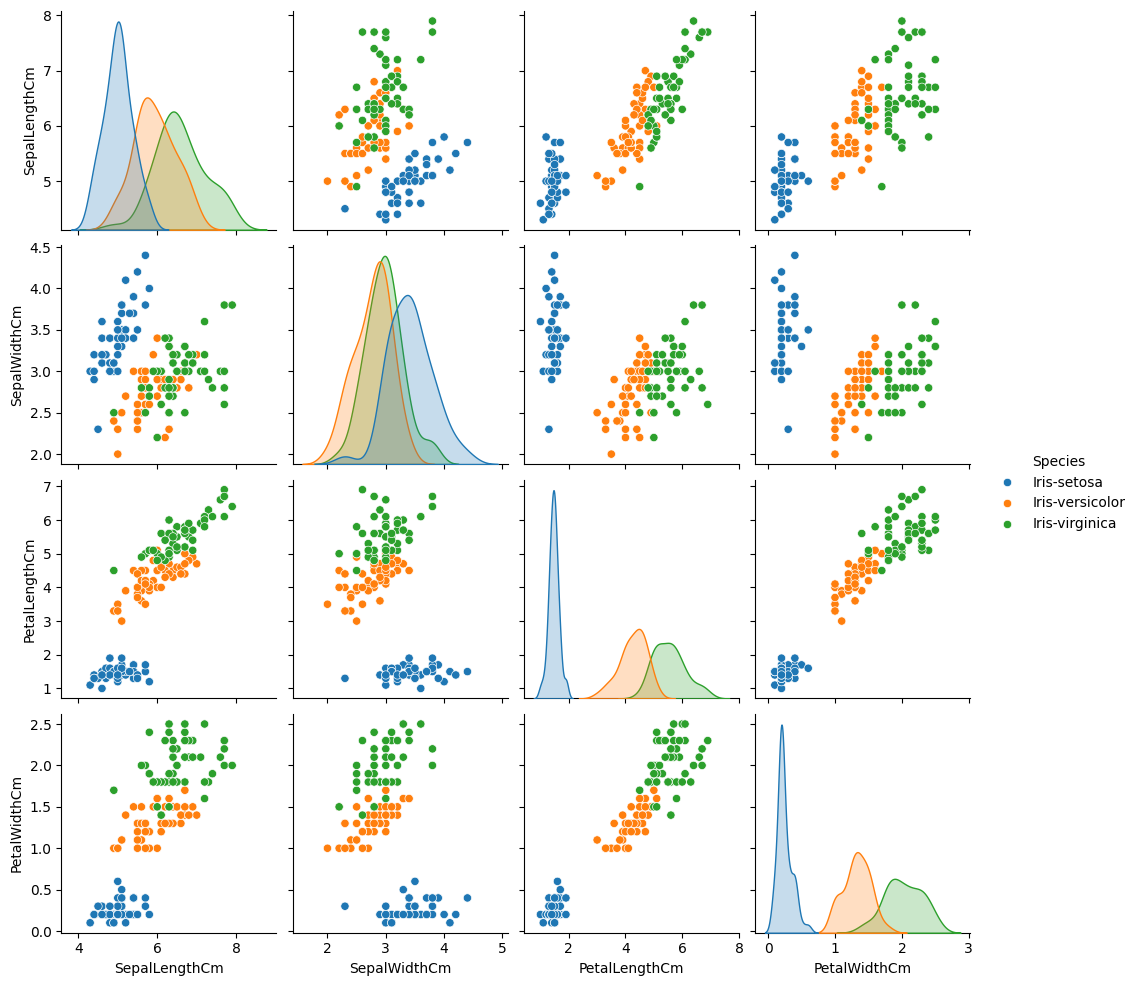

In [9]:
# Pairplot to visualize pairwise relationships in the dataset.
sns.pairplot(data=data, hue='Species')
plt.show()

In [10]:
X = data.drop('Species', axis=1)

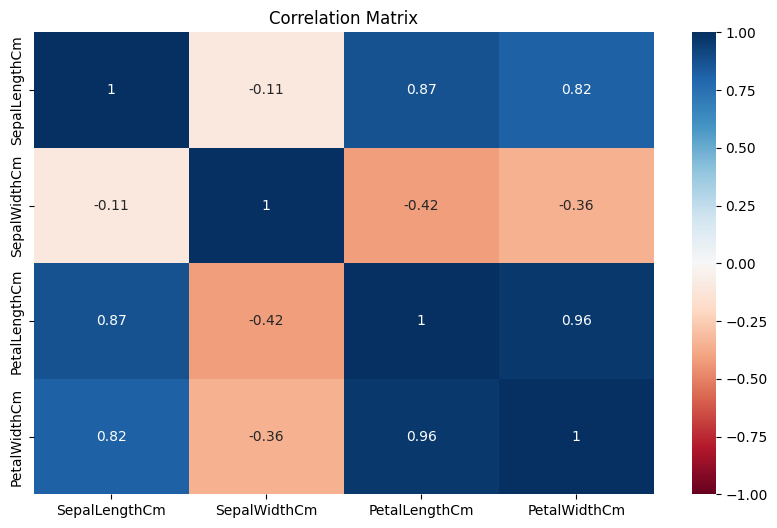

In [11]:
# Calculate the correlation matrix
correlation_matrix = X.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu', vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()

∴ The correlation matrix reveals a **strong** relationship between **Petal Width** and **Petal Length** , with a correlation coefficient of **0.96**.



---

## **Finding the Optimal Number of Clusters (K) using Elbow method**

Text(0, 0.5, 'WCSS')

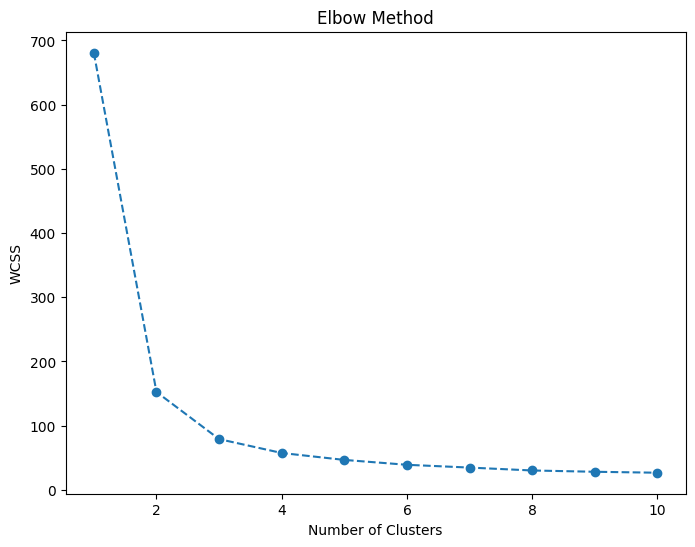

In [12]:
wcss = []

# Calculate WCSS for different numbers of clusters
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

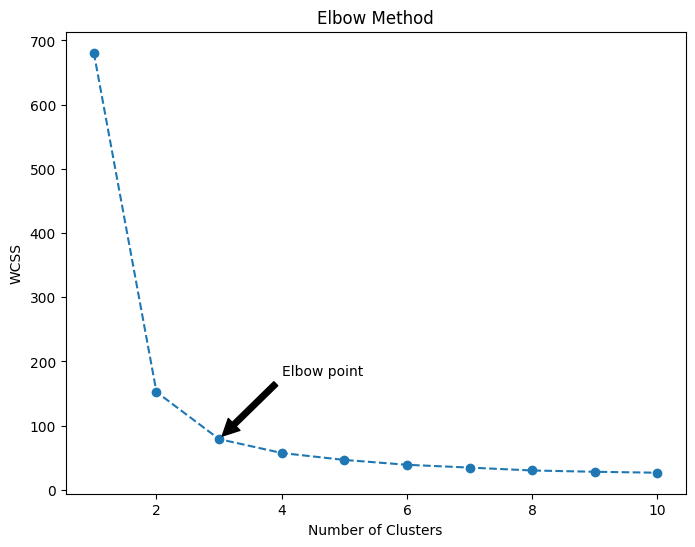

In [13]:
# Show Elbow Point
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

# The elbow point --> the point where the rate of decrease slows down significantly
diff = np.diff(wcss)
plt.annotate('Elbow point', xy=(3, wcss[2]), xytext=(4, wcss[2]+100),
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.show()

> ##### The optimal number of clusters for the Iris dataset is **3**, as indicated by the **elbow point** on the Elbow Method graph.






---


## **K-means Clustering**

In [14]:
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, random_state=42)
y_kmeans = kmeans.fit_predict(X)

In [15]:
data['Cluster'] = y_kmeans

In [16]:
# Clusters Center
cluster_centers = kmeans.cluster_centers_
cluster_df = pd.DataFrame(cluster_centers, columns=X.columns)
print("Cluster Centers:")
print(cluster_df)

Cluster Centers:
   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0       5.901613      2.748387       4.393548      1.433871
1       5.006000      3.418000       1.464000      0.244000
2       6.850000      3.073684       5.742105      2.071053


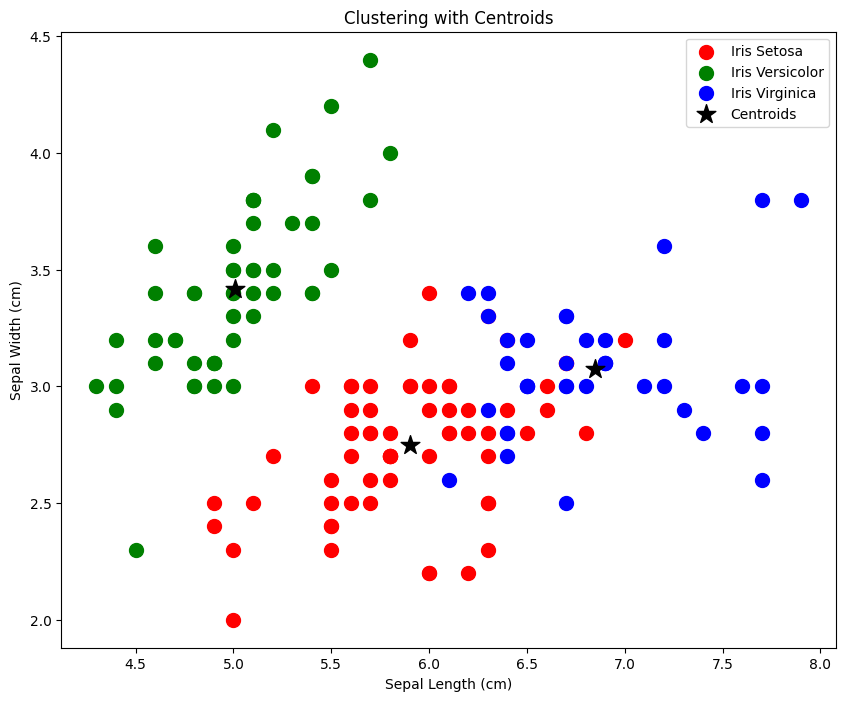

In [17]:
plt.figure(figsize=(10, 8))

# Plotting data points for each cluster
plt.scatter(X[y_kmeans == 0].iloc[:, 0], X[y_kmeans == 0].iloc[:, 1], s=100, c='red', label='Iris Setosa')
plt.scatter(X[y_kmeans == 1].iloc[:, 0], X[y_kmeans == 1].iloc[:, 1], s=100, c='green', label='Iris Versicolor')
plt.scatter(X[y_kmeans == 2].iloc[:, 0], X[y_kmeans == 2].iloc[:, 1], s=100, c='blue', label='Iris Virginica')

# Plotting centroids
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], s=200, c='black', marker='*', label='Centroids')

plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Clustering with Centroids')
plt.legend()
plt.show()
